In [15]:
import nltk
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import re

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

# READ DATA

In [4]:
data = pd.read_excel('/content/drive/MyDrive/dataset_penyisihan_bdc_2024.xlsx')
data.head()

,text,label
0,Kunjungan Prabowo ini untuk meresmikan dan men...,Sumber Daya Alam
1,RT Anies dapat tepuk tangan meriah saat jadi R...,Politik
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi
3,RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...,Politik
4,Anies Baswedan Harap ASN termasuk TNI dan Polr...,Politik


# VISULIZATION

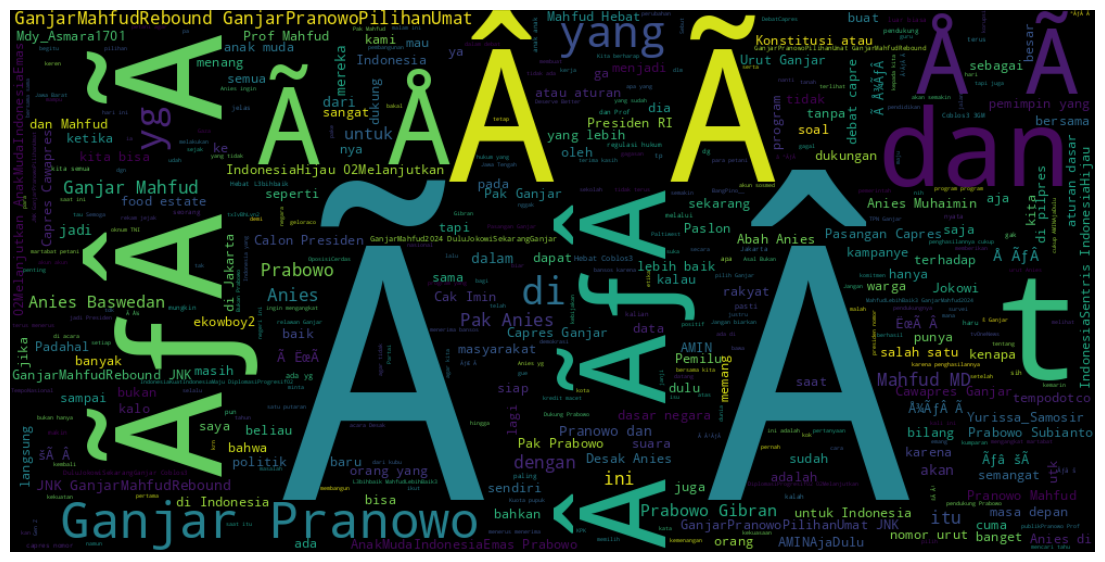

In [5]:
df = ' '.join(data['text'].tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT','RE', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color='black',
               max_words=400, width=1000, height=500)
wc.generate(df)

plt.figure(figsize=(14,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# PREPROCESSING

## 1. CLEANING

In [6]:
def clean_twitter_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)

  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  text = re.sub(r'\b[A-Za-z0-9_]{10,}\b', '', text)
  text = re.sub(r'\s+', ' ', text).strip()

  return text

data['cleasing'] = data['text'].apply(clean_twitter_text)

In [ ]:
data.head()

,text,label,cleasing
0,Kunjungan Prabowo ini untuk meresmikan dan men...,Sumber Daya Alam,Kunjungan Prabowo ini untuk dan proyek bantuan...
1,RT Anies dapat tepuk tangan meriah saat jadi R...,Politik,Anies dapat tepuk tangan meriah saat jadi Rekt...
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi,emng bener sih pendukung 01 ada yg goblok begi...
3,RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...,Politik,Sewaktu anies bersikap kritis ke kinerja pak p...
4,Anies Baswedan Harap ASN termasuk TNI dan Polr...,Politik,Anies Baswedan Harap ASN termasuk TNI dan Polr...


## 2. CASE FOLDING

In [7]:
def case_folding(text):
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text

data['case_folding'] = data['cleasing'].apply(case_folding)
data.head()

,text,label,cleasing,case_folding
0,Kunjungan Prabowo ini untuk meresmikan dan men...,Sumber Daya Alam,Kunjungan Prabowo ini untuk dan proyek bantuan...,kunjungan prabowo ini untuk dan proyek bantuan...
1,RT Anies dapat tepuk tangan meriah saat jadi R...,Politik,Anies dapat tepuk tangan meriah saat jadi Rekt...,anies dapat tepuk tangan meriah saat jadi rekt...
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi,emng bener sih pendukung 01 ada yg goblok begi...,emng bener sih pendukung 01 ada yg goblok begi...
3,RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...,Politik,Sewaktu anies bersikap kritis ke kinerja pak p...,sewaktu anies bersikap kritis ke kinerja pak p...
4,Anies Baswedan Harap ASN termasuk TNI dan Polr...,Politik,Anies Baswedan Harap ASN termasuk TNI dan Polr...,anies baswedan harap asn termasuk tni dan polr...


## 3. NORMALIZATION

In [8]:
norm = {"yg": "yang",
        "gak": "tidak",
        "krn": "karena",
        "krna": "karena",
        "dg": "dengan",
        "dgn": "dengan",
        "gw": "saya",
        "gua": "saya",
        "gue": "saya",
        "sy": "saya",
        "nyerang": 'serang',
        "thdp": "terhadap",
        "udh": "sudah",
        "sdh": "sudah",
        "jd": "jadi",
        "msh": "masih",
        "sdg": "sedang",
        "tp": "tapi",
        "jg": "juga",
        "hny": "hanya",
        "thn": "tahun",
        "dpt": "dapat",
        "jgn": "jangan",
        "scr": "secara",
        "brantem": "berkelahi",
        "cb": "coba",
        "aja": "saja",
        "klo": "kalau",
        "klau": "kalau",
        "kalo": "kalau",
        "lakuin": "lakukan",
        "org": "orang",
        "nggak": "tidak",
        "klar": "kelar",
        "bener": "benar",
        "dlm": "dalam",
        }

In [9]:
def normalization(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

data['normalize'] = data['case_folding'].apply(lambda x: normalization(x))
data.head()

,text,label,cleasing,case_folding,normalize
0,Kunjungan Prabowo ini untuk meresmikan dan men...,Sumber Daya Alam,Kunjungan Prabowo ini untuk dan proyek bantuan...,kunjungan prabowo ini untuk dan proyek bantuan...,kunjungan prabowo ini untuk dan proyek bantuan...
1,RT Anies dapat tepuk tangan meriah saat jadi R...,Politik,Anies dapat tepuk tangan meriah saat jadi Rekt...,anies dapat tepuk tangan meriah saat jadi rekt...,anies dapat tepuk tangan meriah saat jadi rekt...
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi,emng bener sih pendukung 01 ada yg goblok begi...,emng bener sih pendukung 01 ada yg goblok begi...,emng benar sih pendukung 01 ada yang goblok be...
3,RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...,Politik,Sewaktu anies bersikap kritis ke kinerja pak p...,sewaktu anies bersikap kritis ke kinerja pak p...,sewaktu anies bersikap kritis ke kinerja pak p...
4,Anies Baswedan Harap ASN termasuk TNI dan Polr...,Politik,Anies Baswedan Harap ASN termasuk TNI dan Polr...,anies baswedan harap asn termasuk tni dan polr...,anies baswedan harap asn termasuk tni dan polr...


## 4. TOKENIZATION

In [10]:
def tokenize(text):
  tokens = text.split()
  return tokens

data['tokenize'] = data['normalize'].apply(tokenize)
data.head()

,text,label,cleasing,case_folding,normalize,tokenize
0,Kunjungan Prabowo ini untuk meresmikan dan men...,Sumber Daya Alam,Kunjungan Prabowo ini untuk dan proyek bantuan...,kunjungan prabowo ini untuk dan proyek bantuan...,kunjungan prabowo ini untuk dan proyek bantuan...,"[kunjungan, prabowo, ini, untuk, dan, proyek, ..."
1,RT Anies dapat tepuk tangan meriah saat jadi R...,Politik,Anies dapat tepuk tangan meriah saat jadi Rekt...,anies dapat tepuk tangan meriah saat jadi rekt...,anies dapat tepuk tangan meriah saat jadi rekt...,"[anies, dapat, tepuk, tangan, meriah, saat, ja..."
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi,emng bener sih pendukung 01 ada yg goblok begi...,emng bener sih pendukung 01 ada yg goblok begi...,emng benar sih pendukung 01 ada yang goblok be...,"[emng, benar, sih, pendukung, 01, ada, yang, g..."
3,RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...,Politik,Sewaktu anies bersikap kritis ke kinerja pak p...,sewaktu anies bersikap kritis ke kinerja pak p...,sewaktu anies bersikap kritis ke kinerja pak p...,"[sewaktu, anies, bersikap, kritis, ke, kinerja..."
4,Anies Baswedan Harap ASN termasuk TNI dan Polr...,Politik,Anies Baswedan Harap ASN termasuk TNI dan Polr...,anies baswedan harap asn termasuk tni dan polr...,anies baswedan harap asn termasuk tni dan polr...,"[anies, baswedan, harap, asn, termasuk, tni, d..."


## 5. FILTERING/STOPWORDS REMOVAL

In [16]:
stop_words = stopwords.words('indonesian')
custom_stopwords = ['tidak', 'ya', 'sih',]

stop_words.extend(custom_stopwords)

In [17]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

data['filtering/stopword_removal'] = data['tokenize'].apply(lambda x: remove_stopwords(x))
data.head()

,text,label,cleasing,case_folding,normalize,tokenize,filtering/stopword_removal
0,Kunjungan Prabowo ini untuk meresmikan dan men...,Sumber Daya Alam,Kunjungan Prabowo ini untuk dan proyek bantuan...,kunjungan prabowo ini untuk dan proyek bantuan...,kunjungan prabowo ini untuk dan proyek bantuan...,"[kunjungan, prabowo, ini, untuk, dan, proyek, ...","[kunjungan, prabowo, proyek, bantuan, air, ber..."
1,RT Anies dapat tepuk tangan meriah saat jadi R...,Politik,Anies dapat tepuk tangan meriah saat jadi Rekt...,anies dapat tepuk tangan meriah saat jadi rekt...,anies dapat tepuk tangan meriah saat jadi rekt...,"[anies, dapat, tepuk, tangan, meriah, saat, ja...","[anies, tepuk, tangan, meriah, rektor, mata, k..."
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi,emng bener sih pendukung 01 ada yg goblok begi...,emng bener sih pendukung 01 ada yg goblok begi...,emng benar sih pendukung 01 ada yang goblok be...,"[emng, benar, sih, pendukung, 01, ada, yang, g...","[emng, pendukung, 01, goblok, pendukung, 02, h..."
3,RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...,Politik,Sewaktu anies bersikap kritis ke kinerja pak p...,sewaktu anies bersikap kritis ke kinerja pak p...,sewaktu anies bersikap kritis ke kinerja pak p...,"[sewaktu, anies, bersikap, kritis, ke, kinerja...","[anies, bersikap, kritis, kinerja, prabowo, di..."
4,Anies Baswedan Harap ASN termasuk TNI dan Polr...,Politik,Anies Baswedan Harap ASN termasuk TNI dan Polr...,anies baswedan harap asn termasuk tni dan polr...,anies baswedan harap asn termasuk tni dan polr...,"[anies, baswedan, harap, asn, termasuk, tni, d...","[anies, baswedan, harap, asn, tni, polri, pega..."


## 6. STEMMING

In [19]:
# @title
! pip install Sastrawi

In [30]:
# @title
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [ ]:
# @title
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
  return [stemmer.stem(word) for word in text]

data['stemming_data'] = data['filtering/stopword_removal'].apply(lambda x: ' '.join(stem_text(x)))
data.head()

# TRAINING

In [22]:
pip install jcopml

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.4 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.2.7-py2.py3-none-any.whl size=45916 sha256=0dab59475ee82b929db8fff990a05e1dc7d01ad4e52d7a28df76728a56acaca1
  Stored in directory: /root/.cache/pip/wheels/1b/f0/69/8cd4944dd9637953ab744056b5faa32617cd4de449b213e886
Successfully built jcopml


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
from sklearn.linear_model import LogisticRegression

In [24]:
X = data['normalize']
y = data['label']

In [25]:
y.value_counts()

label
Politik                    2972
Sosial Budaya               587
Ideologi                    400
Pertahanan dan Keamanan     400
Ekonomi                     367
Sumber Daya Alam            192
Demografi                    62
Geografi                     20
Name: count, dtype: int64

In [26]:
label_dict = {
    'Politik': 1,
    'Sosial Budaya': 2,
    'Pertahanan dan Keamanan': 3,
    'Ideologi': 4,
    'Ekonomi': 5,
    'Sumber Daya Alam': 6,
    'Demografi': 7,
    'Geografi': 8
}

y = y.map(label_dict)

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((4000,), (1000,), (4000,), (1000,))

In [28]:
pipeline = Pipeline([
    ('prep', TfidfVectorizer(tokenizer=word_tokenize)),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.logreg_params, cv=3, n_iter=50,
                           n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_val, y_val))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'algo__C': 3.8672288491177538, 'algo__fit_intercept': False}
0.94125 0.7582476578664906 0.751


In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

In [33]:
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, stop_words, norm_dict):
        self.stop_words = stop_words
        self.norm_dict = norm_dict

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_clean = X.apply(clean_twitter_text)
        X_folded = X_clean.apply(case_folding)
        X_normalized = X_folded.apply(lambda x: normalization(x))
        X_tokenized = X_normalized.apply(lambda x: x.split())
        X_filtered = X_tokenized.apply(lambda x: ' '.join([word for word in x if word not in self.stop_words]))
        return X_filtered

# Initialization of custom components
indonesian_stop_words = stopwords.words('indonesian')
custom_stopwords = ['tidak', 'ya', 'sih']
indonesian_stop_words.extend(custom_stopwords)

norm_dict = {"yg": "yang",
        "gak": "tidak",
        "krn": "karena",
        "krna": "karena",
        "dg": "dengan",
        "dgn": "dengan",
        "gw": "saya",
        "gua": "saya",
        "gue": "saya",
        "sy": "saya",
        "nyerang": 'serang',
        "thdp": "terhadap",
        "udh": "sudah",
        "sdh": "sudah",
        "jd": "jadi",
        "msh": "masih",
        "sdg": "sedang",
        "tp": "tapi",
        "jg": "juga",
        "hny": "hanya",
        "thn": "tahun",
        "dpt": "dapat",
        "jgn": "jangan",
        "scr": "secara",
        "brantem": "berkelahi",
        "cb": "coba",
        "aja": "saja",
        "klo": "kalau",
        "klau": "kalau",
        "kalo": "kalau",
        "lakuin": "lakukan",
        "org": "orang",
        "nggak": "tidak",
        "klar": "kelar",
        "bener": "benar",
        "dlm": "dalam",
        }

# Create an instance of the custom TextPreprocessor
text_preprocessor = TextPreprocessor(stop_words=indonesian_stop_words, norm_dict=norm_dict)


In [35]:
pipeline = Pipeline([
    ('prep', TextPreprocessor(stop_words=indonesian_stop_words, norm_dict=norm_dict)),
    ('tfidf', TfidfVectorizer(tokenizer=word_tokenize)),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.logreg_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

# Evaluation
print(model.best_params_)
print("Training score:", model.score(X_train, y_train), "Validation score:", model.score(X_val, y_val))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'algo__C': 9.443515687962691, 'algo__fit_intercept': False}
Training score: 0.97775 Validation score: 0.76


# Testing

In [38]:
data_test = pd.read_excel("/content/drive/MyDrive/dataset_unlabeled_penyisihan_bdc_2024.xlsx")

In [39]:
data_test.head()

,IDText,Text
0,TXT0001,Lu mau org2 pro-demokrasi di negara ini bisa p...
1,TXT0002,Prabowo ditanya soal hutang luar negeri dia me...
2,TXT0003,kiki_daliyo Ganjar Pranowo itulah beliau soso...
3,TXT0004,@kumparan Prabowo Gibran yang bisa melakukan i...
4,TXT0005,@sniperruben45 @uda_zulhendra @ainunnajib Lah ...


In [40]:
test = data_test['Text']

In [49]:
predicted_labels = model.predict(test)

In [52]:
reverse_label_dict = {v: k for k, v in label_dict.items()}

predicted_labels_categorical = [reverse_label_dict[label] for label in predicted_labels]

result_df = data_test.copy()
result_df['Predicted_Label'] = predicted_labels_categorical

In [53]:
result_df

,IDText,Text,Predicted_Label
0,TXT0001,Lu mau org2 pro-demokrasi di negara ini bisa p...,Politik
1,TXT0002,Prabowo ditanya soal hutang luar negeri dia me...,Politik
2,TXT0003,kiki_daliyo Ganjar Pranowo itulah beliau soso...,Politik
3,TXT0004,@kumparan Prabowo Gibran yang bisa melakukan i...,Politik
4,TXT0005,@sniperruben45 @uda_zulhendra @ainunnajib Lah ...,Politik
...,...,...,...
995,TXT0996,"Bikin bangga deh, Ganjar-Mahfud mau alokasikan...",Politik
996,TXT0997,Pak Jokowi sebelum pilpres 2024 berbesar hati ...,Politik
997,TXT0998,@datuakrajoangek Sbaiknya si gemot nga usah ik...,Politik
998,TXT0999,kebiasaan merembuk atau bermusyawarah jadi gay...,Ekonomi
